SUBMISION DICODING

MACHINE LEARNING PEMULA
 
    Nama  : Riski Dwi Pangestu
    Email : riskidwipangestu@students.undip.ac.id

In [3]:
import tensorflow as tf
print(tf.__version__)
!wget https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip



2.5.0
--2021-07-14 03:56:37--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  5.13MB/s    in 75s     

2021-07-14 03:57:53 (4.09 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



2. ekstraksi file

In [4]:
import zipfile,os
zip_extract = zipfile.ZipFile('rockpaperscissors.zip')
zip_extract.extractall()
zip_extract.close()

base_dir = os.path.join('/content/rockpaperscissors/rps-cv-images')


In [5]:
# Callback akan menghentikan training,jika akurasi telah tercapai
class custom_Callback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>= 0.97):
      print("\nAkurasi telah mencapai 97%, training dihentikan!")
      self.model.stop_training = True

callback = custom_Callback()

In [6]:
rock_dir = os.path.join("/content/rockpaperscissors/rock")
paper_dir = os.path.join("/content/rockpaperscissors/paper")
scissors_dir = os.path.join("/content/rockpaperscissors/scissors")

In [7]:
os.listdir(base_dir)

['rock', 'scissors', 'README_rpc-cv-images.txt', 'paper']

Prepocessing Data

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest',
                    zoom_range=0.2,
                    height_shift_range=0.2,
                    width_shift_range=0.2,  
                    validation_split=0.4)

test_datagen = ImageDataGenerator(
                   rescale=1./255,
                   rotation_range=20,
                   horizontal_flip=True,
                   shear_range = 0.2,
                   fill_mode = 'nearest',
                   zoom_range=0.2,
                   height_shift_range=0.2,
                   width_shift_range=0.2, 
                   validation_split=0.4)

In [12]:
    train_generator = train_datagen.flow_from_directory(
            base_dir, 
            target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
            batch_size=32,
            class_mode='categorical', # karena kita merupakan masalah klasifikasi 3 kelas maka menggunakan class_mode = 'categorical'
            subset="training")
     
    validation_generator = test_datagen.flow_from_directory(
            base_dir, 
            target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
            batch_size=32, 
            class_mode='categorical',# karena kita merupakan masalah klasifikasi 3 kelas maka menggunakan class_mode = 'categorical'
            subset="validation")

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [14]:
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax')
    ])

In [15]:
    # compile model dengan 'adam' optimizer loss function 'categorical_crossentropy' 
    model.compile(loss='categorical_crossentropy',
                  optimizer=tf.optimizers.Adam(),
                  metrics=['accuracy'])

In [16]:
# latih model dengan model.fit 
model_training = model.fit(
      train_generator,
      steps_per_epoch=25,  
      epochs= 30, 
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=10, 
      verbose=2,
        callbacks = [callback]
)

Epoch 1/30
25/25 - 47s - loss: 1.1195 - accuracy: 0.3312 - val_loss: 1.0897 - val_accuracy: 0.3375
Epoch 2/30
25/25 - 45s - loss: 1.0534 - accuracy: 0.4519 - val_loss: 1.0433 - val_accuracy: 0.5063
Epoch 3/30
25/25 - 45s - loss: 0.9859 - accuracy: 0.4909 - val_loss: 0.8450 - val_accuracy: 0.6562
Epoch 4/30
25/25 - 45s - loss: 0.6709 - accuracy: 0.7299 - val_loss: 0.6780 - val_accuracy: 0.6938
Epoch 5/30
25/25 - 46s - loss: 0.4902 - accuracy: 0.8013 - val_loss: 0.4034 - val_accuracy: 0.8406
Epoch 6/30
25/25 - 45s - loss: 0.4466 - accuracy: 0.8247 - val_loss: 0.3396 - val_accuracy: 0.8844
Epoch 7/30
25/25 - 44s - loss: 0.4121 - accuracy: 0.8403 - val_loss: 0.4538 - val_accuracy: 0.8406
Epoch 8/30
25/25 - 44s - loss: 0.3688 - accuracy: 0.8558 - val_loss: 0.3862 - val_accuracy: 0.8531
Epoch 9/30
25/25 - 45s - loss: 0.3002 - accuracy: 0.8883 - val_loss: 0.2697 - val_accuracy: 0.9062
Epoch 10/30
25/25 - 45s - loss: 0.3089 - accuracy: 0.8818 - val_loss: 0.3100 - val_accuracy: 0.9000
Epoch 11/

In [20]:
model.evaluate(validation_generator)

28/28 [==============================] - 16s 561ms/step - loss: 0.0936 - accuracy: 0.9737


[0.09360808879137039, 0.9736841917037964]

Saving 0CSaM2vL2cWX6Cay.png to 0CSaM2vL2cWX6Cay.png
0CSaM2vL2cWX6Cay.png
scissors


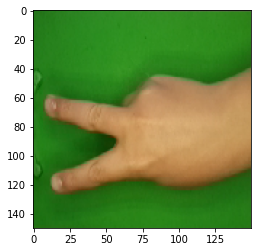

In [23]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('paper')
  elif classes[0,1]!=0:
    print('rock')
  else:
    print('scissors')